<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Shape: (178, 13)
New Shape: (178, 2)


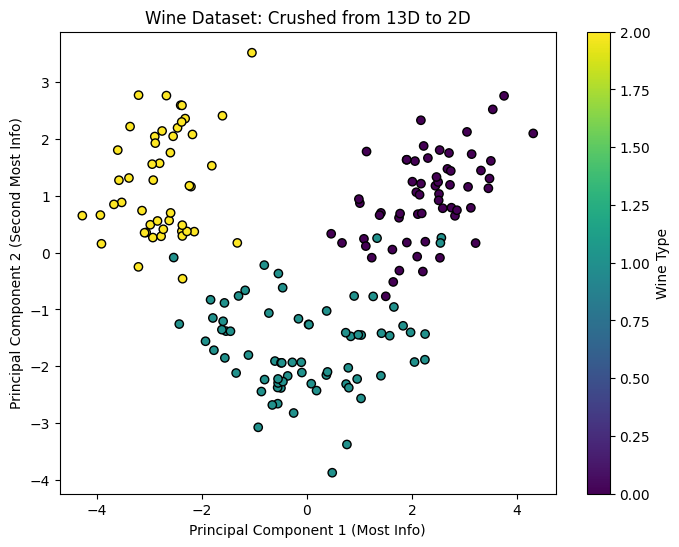

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Get the Data (13 Dimensions)
data = load_wine()
X = data.data  # The 13 features
y = data.target # The Wine Types (0, 1, 2)

print(f"Original Shape: {X.shape}") # (178 rows, 13 cols)

# 2. STANDARDIZE THE DATA (Mandatory for PCA!)
# PCA is sensitive to scale. If one column is "1000" and another is "0.1", it fails.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (Crush 13 -> 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"New Shape: {X_pca.shape}") # (178 rows, 2 cols)

# 4. Visualize the Result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Wine Dataset: Crushed from 13D to 2D")
plt.xlabel("Principal Component 1 (Most Info)")
plt.ylabel("Principal Component 2 (Second Most Info)")
plt.colorbar(label='Wine Type')
plt.show()

In [7]:
print(f"Variance explained: {pca.explained_variance_ratio_}")
print(f"Total Info Retained: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

Variance explained: [0.36198848 0.1920749 ]
Total Info Retained: 55.41%


info retain is 55% while we usually target 85-95%

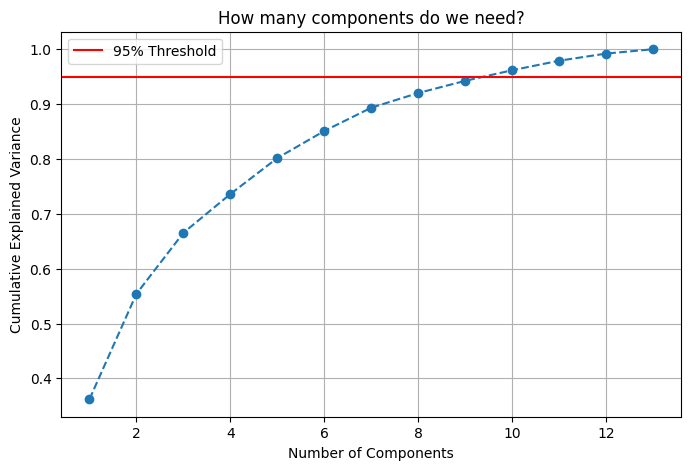

To keep 95% of the info, we need 10 components.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load & Scale
data = load_wine()
X_scaled = StandardScaler().fit_transform(data.data)

# 2. Run PCA without specifying a number (It keeps all 13)
pca = PCA()
pca.fit(X_scaled)

# 3. Calculate Cumulative Variance
# np.cumsum adds them up: [0.36, 0.55, 0.66, ...]
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 4. Plot it
plt.figure(figsize=(8, 5))
plt.plot(range(1, 14), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many components do we need?')
plt.grid()
plt.legend()
plt.show()

# 5. The Answer
# np.argmax returns the first index where the condition is True
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"To keep 95% of the info, we need {n_95} components.")